In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [14]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [15]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [16]:
mi_kkr=matches[((matches.team1=='Mumbai Indians') | (matches.team2=='Mumbai Indians')) & ((matches.team1=='Kolkata Knight Riders') | (matches.team2=='Kolkata Knight Riders'))]
mi=matches[(matches.team1=='Mumbai Indians') | (matches.team2=='Mumbai Indians')]              
kkr=matches[(matches.team1=='Kolkata Knight Riders') | (matches.team2=='Kolkata Knight Riders')]

In [17]:
mi_kkrdeli=deliveries[((deliveries.batting_team=='Mumbai Indians') | (deliveries.bowling_team=='Mumbai Indians')) & ((deliveries.batting_team=='Kolkata Knight Riders') | (deliveries.bowling_team=='Kolkata Knight Riders'))]
mideli=deliveries[(deliveries.batting_team=='Mumbai Indians') | (deliveries.bowling_team=='Mumbai Indians')]              
kkrdeli=deliveries[(deliveries.batting_team=='Kolkata Knight Riders') | (deliveries.bowling_team=='Kolkata Knight Riders')]

In [18]:
def plot_helper(df,columns,size,plot_type,color):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color=color)
        ax[i].set_title(columns[i])

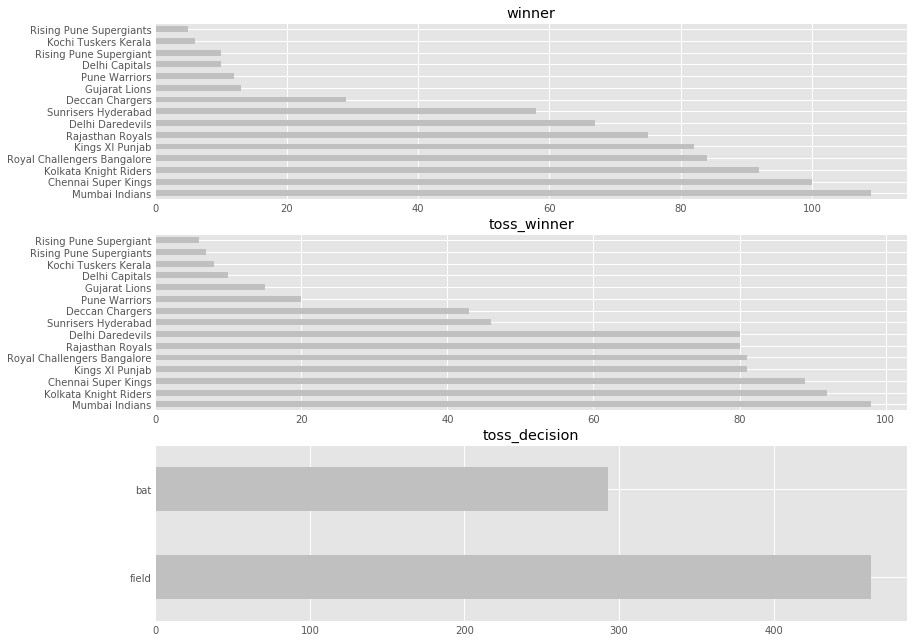

In [19]:

plot_helper(matches,['winner','toss_winner','toss_decision'],(12,11),'barh','silver')


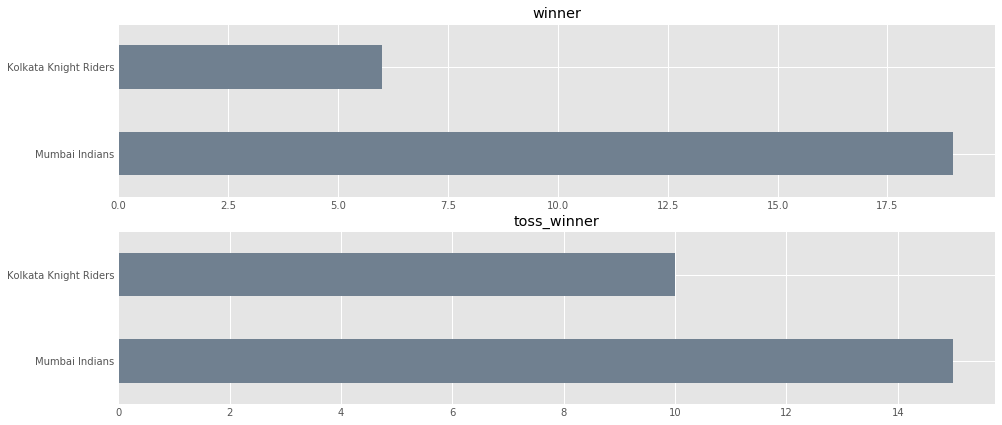

In [20]:
plot_helper(mi_kkr,['winner','toss_winner'],(14,7),'barh','slategray')

### From the above analysis we can see that there is a positive correlation between the toss winner and the winner as happens in most of the matches, this leads us to the conclusion that MI will be the winner

In [81]:
mi_wickets=mideli[(mideli.batting_team=='Mumbai Indians') & (mideli.over>=6) & (mideli.over<=15)].groupby(['match_id','over'],as_index=False).sum()

mi_wickets.head()


,match_id,over,inning,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,2,6,6,21,0,0.0,0,0,0,0,13,0,13
1,2,7,6,21,0,0.0,0,0,0,0,2,0,2
2,2,8,6,21,0,0.0,0,0,0,0,3,0,3
3,2,9,6,21,0,0.0,0,0,0,0,10,0,10
4,2,10,6,21,0,0.0,0,0,0,0,6,0,6


In [98]:
mideli.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [82]:

mi_wickets.over.unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15], dtype=int64)

In [83]:
#To confirm whether the data is only indicating to MI when they are batting
temp=deliveries[(deliveries.batting_team=='Mumbai Indians') & ((deliveries.over>=6) & (deliveries.over<=15))].groupby(['match_id',
                                                                                                                  'over'],
                                                                                                                 as_index=False).sum().batsman_runs.mean()
temp2=mi_wickets.batsman_runs.mean()

temp==temp2

True

In [84]:
mi_wickets.batsman_runs.describe(percentiles=[.8])

count    1857.000000
mean        7.358643
std         4.216472
min         0.000000
50%         7.000000
80%        11.000000
max        26.000000
Name: batsman_runs, dtype: float64

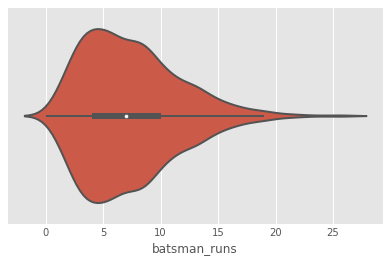

In [186]:

sns.violinplot(mi_wickets.batsman_runs)

In [185]:
mi_wickets.total_runs.describe(percentiles=[.8])

count    1857.000000
mean        7.718363
std         4.292868
min         0.000000
50%         7.000000
80%        11.000000
max        26.000000
Name: total_runs, dtype: float64

### I calculated the runs that MI can score within the 6th-15th overs instead of wickets as I could'nt find any relevant to do that although this won't be considered for scores,the range of runs will be 4-15 

In [99]:
kkrdeli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
495,3,1,Gujarat Lions,Kolkata Knight Riders,1,1,JJ Roy,BB McCullum,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
496,3,1,Gujarat Lions,Kolkata Knight Riders,1,2,JJ Roy,BB McCullum,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
497,3,1,Gujarat Lions,Kolkata Knight Riders,1,3,JJ Roy,BB McCullum,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
498,3,1,Gujarat Lions,Kolkata Knight Riders,1,4,JJ Roy,BB McCullum,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
499,3,1,Gujarat Lions,Kolkata Knight Riders,1,5,JJ Roy,BB McCullum,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [126]:
kkr4s=kkrdeli[kkrdeli.batting_team=='Kolkata Knight Riders'].groupby(['match_id','batsman_runs'],as_index=False).ball.count()
kkr4s=kkr4s[kkr4s.batsman_runs==4]
kkr4s.head()

,match_id,batsman_runs,ball
3,3,4,18
8,7,4,14
13,11,4,20
19,14,4,13
25,18,4,13


In [127]:
kkr4s.ball.describe()

count    178.000000
mean      13.674157
std        4.215321
min        2.000000
25%       11.000000
50%       14.000000
75%       16.000000
max       24.000000
Name: ball, dtype: float64

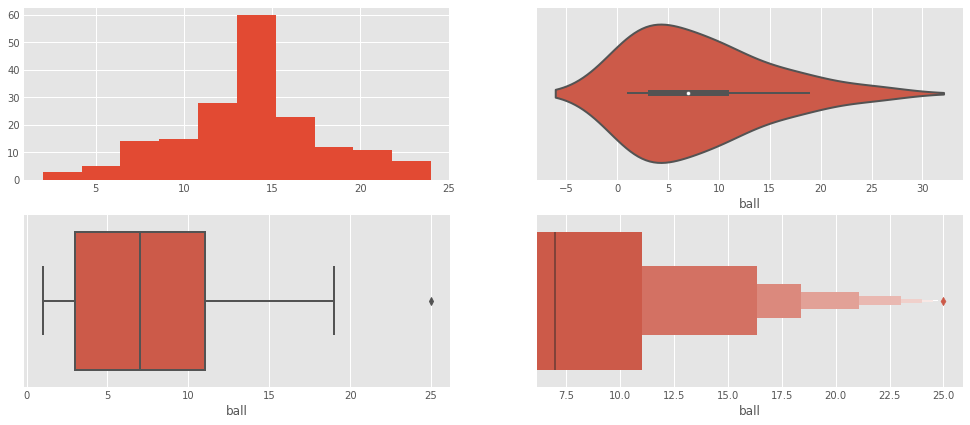

In [138]:
fig,ax=plt.subplots(2,2,figsize=(15,7))

kkr4s.ball.hist(ax=ax[0,0])

sns.violinplot(kkr4s.ball.value_counts(),ax=ax[0,1])

sns.boxplot(kkr4s.ball.value_counts(),ax=ax[1,0])

sns.boxenplot(kkr4s.ball.value_counts(),ax=ax[1,1])

### KKR is likely to hit 10-12 4s in the match

In [143]:
mi_kkrdeli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1424,7,1,Kolkata Knight Riders,Mumbai Indians,1,1,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1425,7,1,Kolkata Knight Riders,Mumbai Indians,1,2,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1426,7,1,Kolkata Knight Riders,Mumbai Indians,1,3,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1427,7,1,Kolkata Knight Riders,Mumbai Indians,1,4,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1428,7,1,Kolkata Knight Riders,Mumbai Indians,1,5,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [146]:
totalruns=mi_kkrdeli.pivot_table(index='match_id',aggfunc='sum').total_runs
totalruns.describe()

count     25.000000
mean     307.400000
std       59.652466
min      135.000000
25%      280.000000
50%      311.000000
75%      338.000000
max      445.000000
Name: total_runs, dtype: float64

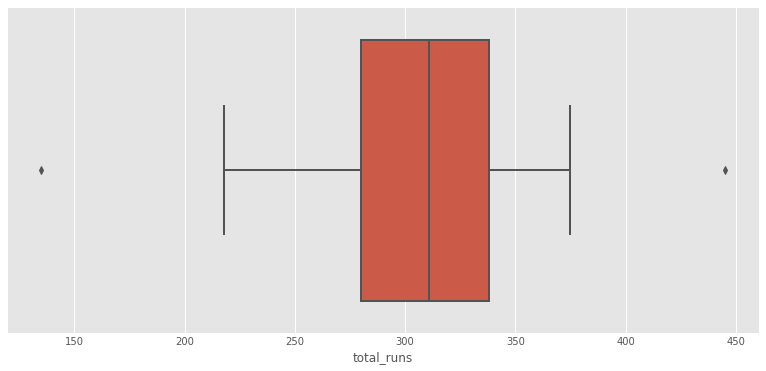

In [150]:
plt.figure(figsize=(12,6))
sns.boxplot(totalruns)

### It seems the total score of the match will be within the range of 307-340

In [165]:
deliveries[deliveries.batsman.str.contains('Sharma')].head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
275,2,1,Mumbai Indians,Rising Pune Supergiant,5,3,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [170]:
rsharma=deliveries[(deliveries.batsman=='RG Sharma') &(deliveries.player_dismissed=='RG Sharma')]
rsharma

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
287,2,1,Mumbai Indians,Rising Pune Supergiant,7,3,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,0,RG Sharma,bowled,NaN
1616,7,2,Mumbai Indians,Kolkata Knight Riders,10,5,RG Sharma,N Rana,SP Narine,0,...,0,0,0,0,0,0,0,RG Sharma,lbw,NaN
2270,10,2,Mumbai Indians,Sunrisers Hyderabad,5,5,RG Sharma,PA Patel,Rashid Khan,0,...,0,0,0,0,0,0,0,RG Sharma,lbw,NaN
2729,12,2,Mumbai Indians,Royal Challengers Bangalore,3,4,RG Sharma,N Rana,S Badree,0,...,0,0,0,0,0,0,0,RG Sharma,bowled,NaN
5564,24,1,Mumbai Indians,Delhi Daredevils,9,1,RG Sharma,KA Pollard,A Mishra,0,...,0,0,0,0,0,0,0,RG Sharma,caught,PJ Cummins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175287,11335,1,Mumbai Indians,Chennai Super Kings,17,2,RG Sharma,HH Pandya,M Santner,0,...,0,0,0,0,0,0,0,RG Sharma,caught,M Vijay
176055,11338,2,Mumbai Indians,Kolkata Knight Riders,4,3,RG Sharma,E Lewis,H Gurney,0,...,0,0,0,0,0,0,0,RG Sharma,lbw,NaN
176718,11342,1,Mumbai Indians,Sunrisers Hyderabad,6,2,RG Sharma,Q de Kock,K Ahmed,0,...,0,0,0,0,0,0,0,RG Sharma,caught,Mohammad Nabi
178227,11412,2,Mumbai Indians,Chennai Super Kings,1,2,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,0,0,0,RG Sharma,lbw,NaN


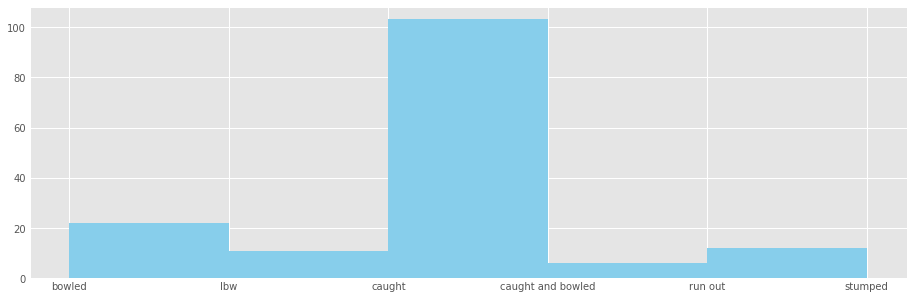

In [181]:
plt.figure(figsize=(14,5))
rsharma.dismissal_kind.hist(bins=5,color='skyblue')

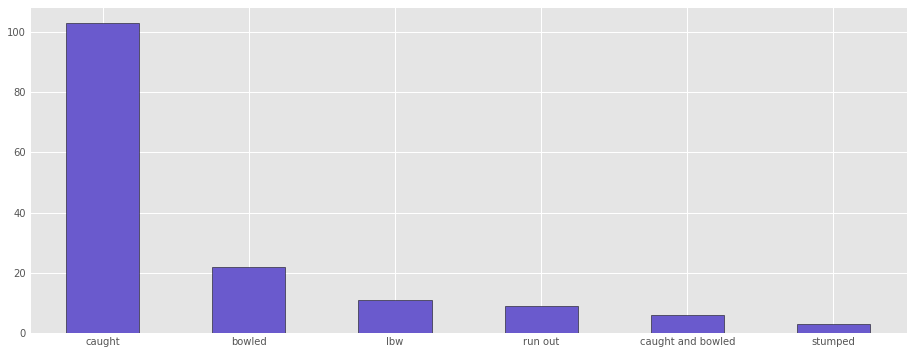

In [184]:

for i in rsharma.dismissal_kind.value_counts().plot.bar(figsize=(14,6),
                                                       edgecolor='k',
                                                       color='slateblue'
                                                       ).get_xticklabels():
    i.set_rotation(0)

### In the case of Rohit Sharma it's pretty evident that if he will be out it is most likely to happen do to the ball getting caught.